In [1]:
#import the nessecary libray 
import random 
random.seed(0) 

import numpy as np 
np.random.seed(0)

import tensorflow as tf 
tf.random.set_seed(0)

2025-12-03 15:08:19.124820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os 
import json 
from zipfile import ZipFile 
from PIL import Image 

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers,models 


In [3]:
base_dir ='../plantvillage dataset/color'

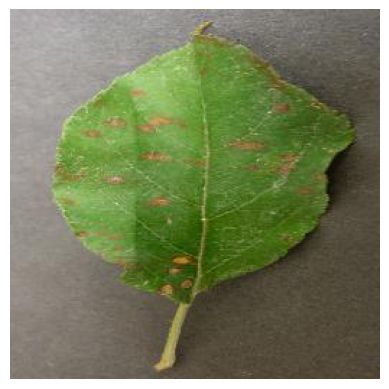

In [4]:
image_path ='../plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# read the image 
img =mpimg.imread(image_path) 
# display the image 
plt.imshow(img) 
plt.axis('off')
plt.show()

In [5]:
# image parameter
image_size = 224 
batch_size = 32 


### Train test split 

In [6]:
data_gen =ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
)

In [7]:
training_generator =data_gen.flow_from_directory(
    base_dir,
    target_size=(image_size,image_size) , 
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [8]:
validation_generator =data_gen.flow_from_directory(
    base_dir,
    target_size=(image_size,image_size) , 
    batch_size=batch_size,
    subset='validation', 
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


### Convolution Neural Network

In [9]:
# model defination 
model =models.Sequential() 

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(image_size,image_size,3))) 
model.add(layers.MaxPooling2D(2,2)) 

model.add(layers.Conv2D(64,(3,3),activation='relu')) 
model.add(layers.MaxPooling2D(2,2)) 

model.add(layers.Flatten()) 
model.add(layers.Dense(256,activation='relu')) 
model.add(layers.Dense(training_generator.num_classes,activation='softmax')) 

/home/miskatul-masabi/anaconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the Model 
model.compile(optimizer='adam', 
             loss='categorical_crossentropy', 
             metrics=['accuracy']) 

In [12]:
# training the model
history =model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2241s 2s/step - accuracy: 0.7457 - loss: 0.8922 - val_accuracy: 0.8668 - val_loss: 0.4232
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2146s 2s/step - accuracy: 0.9204 - loss: 0.2483 - val_accuracy: 0.8752 - val_loss: 0.3953
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2074s 2s/step - accuracy: 0.9636 - loss: 0.1100 - val_accuracy: 0.8496 - val_loss: 0.6294
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2118s 2s/step - accuracy: 0.9723 - loss: 0.0866 - val_accuracy: 0.8683 - val_loss: 0.5245
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2311s 2s/step - accuracy: 0.9803 - loss: 0.0636 - val_accuracy: 0.8861 - val_loss: 0.5112


In [ ]:
# model evaluation  
print("Evaluation model...") 
val_loss,val_accuracy =model.evaluate(validation_generator,steps=validation_generator.samples//batch_size) 
print(f"Validation Accuracy : {val_accuracy* 100:.2f}%") 


Evaluation model...
143/339 ━━━━━━━━━━━━━━━━━━━━ 1:07 345ms/step - accuracy: 0.8793 - loss: 0.5260